![](../../logo.png)

# Physics Informed Neural Networks in Astrophysics

---

### Alexis Larrañaga - 2024
ealarranaga@unal.edu.co

---

## Solution of a PDE (One-dimensional Non-Linear Advection Equation - Burguer Equation)

The equation of motion for a viscous fluid is 
$$
\rho \left(\frac{\partial \vec{u}}{\partial t} + \vec{u} \cdot \vec{\nabla} \vec{u}\right) = -\vec{\nabla} P + \vec{\nabla} \cdot \sigma ,
$$
where the compinents of the viscosity tensor are given by 
$$
\sigma_{ij} = \rho \nu \left( \partial_i u_j + \partial_j u_i - \frac{2}{3} \partial_k u_k \delta_{ij} \right)
$$

For an incompressible fluid, $\vec{\nabla} \cdot \vec{u} = 0$ with constant pressures, this equation reduces to the non-linear advection equation,
$$
\frac{\partial u_i}{\partial t} + u_j \frac{\partial u_i}{\partial x_j} = \nu \frac{\partial}{\partial x_j}\left( \frac{\partial u_i}{\partial x_j}\right).
$$

For a one-dimensional system, the differential equation becomes 
$$
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = \nu \frac{\partial^2 u}{\partial x^2}
$$

In order to solve this problem, we consider the initial condition
$$
u(t=0,x) = u_o(x) = -\sin (\pi x)
$$
and periodic spatial boundaries. We will solve in the time interval $t\in [0,1]$ and in the spatial domain  $x\in [-1,1]$.


In [1]:
import pinnde.pde_Solvers as pde_Solvers
import pinnde.pde_Initials as pde_Initials
import pinnde.pde_Boundaries_2var as pde_Boundaries
import numpy as np
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

u0 = lambda x: -tf.sin(np.pi*x)
t_bdry = [0,1]
x_bdry = [-1,1]
t_order = 1
N_iv = 100
initials = pde_Initials.setup_initials_2var(t_bdry, x_bdry, t_order, [u0], N_iv)

boundaries = pde_Boundaries.setup_boundaries_periodic_tx(t_bdry, x_bdry)

eqn = "ut+u*ux-(0.01/np.pi)*uxx"
N_pde = 10000
epochs = 1000

mymodel = pde_Solvers.solvePDE_tx(eqn, initials, boundaries, N_pde)
mymodel.train_model(epochs)

mymodel.plot_epoch_loss('epoch_loss.png')

mymodel.plot_solution_prediction('solution.png')


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalize_1         │ (None, 1)         │          0 │ input_layer[0][0] │
│ (Normalize)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ periodic (Periodic) │ (None, 2)         │          0 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 3)         │          0 │ normalize_1[0][0… │
│ (Concatenate)       │                   │            │ periodic[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 60)        │        240 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 60)        │      3,660 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 60)        │      3,660 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 60)        │      3,660 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 1)         │         61 │ dense_3[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 11,281 (88.13 KB)

 Trainable params: 11,281 (88.13 KB)

 Non-trainable params: 0 (0.00 B)

PDE loss, IV loss in 0th epoch:  0.1188,  0.1541.
PDE loss, IV loss in 100th epoch:  0.0424,  0.0659.
PDE loss, IV loss in 200th epoch:  0.0318,  0.0482.
PDE loss, IV loss in 300th epoch:  0.0321,  0.0442.
PDE loss, IV loss in 400th epoch:  0.0290,  0.0539.
PDE loss, IV loss in 500th epoch:  0.0213,  0.0719.
PDE loss, IV loss in 600th epoch:  0.0166,  0.0112.
PDE loss, IV loss in 700th epoch:  0.0127,  0.0156.
PDE loss, IV loss in 800th epoch:  0.0122,  0.0183.
PDE loss, IV loss in 900th epoch:  0.0128,  0.0102.


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

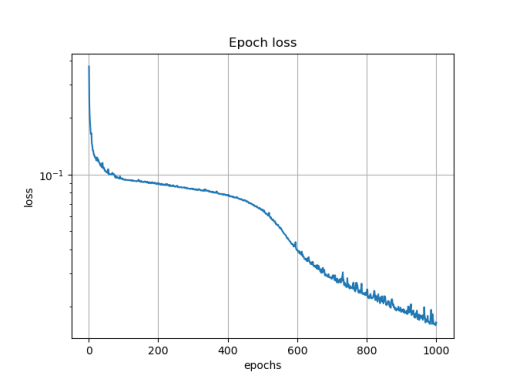

In [2]:
plt.imshow(mpimg.imread('epoch_loss.png'))
plt.axis('off')
plt.show()

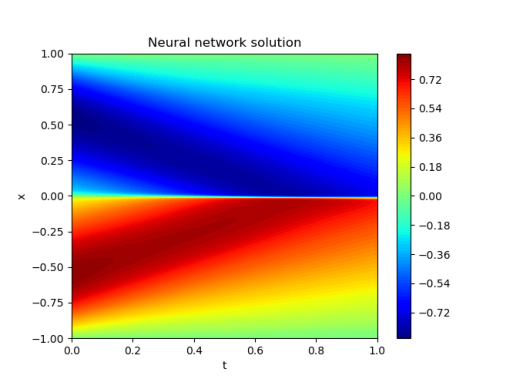

In [3]:
plt.imshow(mpimg.imread('solution.png'))
plt.axis('off')
plt.show()